## Evaluate different version of the NNLS model.  
This is a new line of investigation to see how much the restriction to positive weights
reduces the predictive power of the connectivity model. 

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2025/'

## Evaluate the group L2 and NNLS models 

In [ ]:
# Evaluation 
# Implemented in scripts/script_eval_cortical_act.py


##  Plot evaluations

In [24]:
eval_data = ['WMFS', 'IBC', 'Demand', 'HCPur100', 'Nishimoto', 'Somatotopic','MDTB','Socialsocial', 'Languagelocalizer']
df = rm.comb_eval(models=['MDTBgrp'],
              eval_data=eval_data,
              methods =['L2reg','NNLS'],
              cerebellum='MNISymC3')


Text(0.5, 1.0, 'Average')

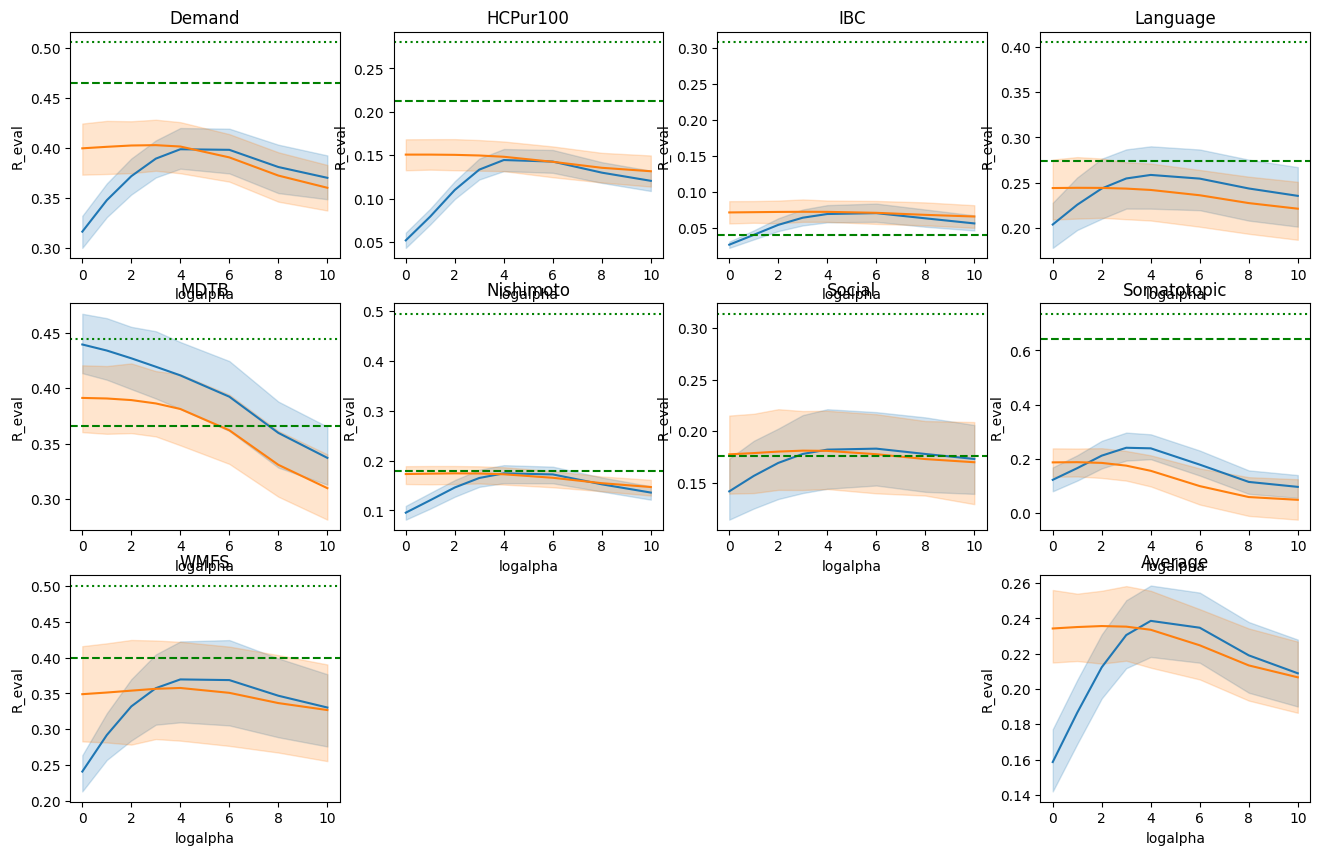

In [27]:
data =np.unique(df['eval_dataset'])
plt.figure(figsize=(16, 10))
for i,ed in enumerate(data):
    D = df[df['eval_dataset']==ed] 
    plt.subplot(3,4,i+1)
    sb.lineplot(data=D,y='R_eval',x='logalpha',hue='method',legend=None)
    plt.title(ed)
    plt.axhline(y=D.group_noiseceil_Y_upper.mean(), color='g', linestyle=':', label='Between subjects (Y)')
    plt.axhline(y=D.group_noiseceil_Y_lower.mean(), color='g', linestyle='--', label='Between subjects (Y)')
D = df[df['eval_dataset']!='MDTB'] 
plt.subplot(3,4,12)
sb.lineplot(data=D,y='R_eval',x='logalpha',hue='method',legend=None)
plt.title('Average')


## Compare models across datasets using the best logalpha

In [ ]:
D = df[((df.method=='NNLS') & (df.logalpha==2)) | ((df.method=='L2Reg') & (df.logalpha==4))]